In [2]:
#Diamond Quality Prediction

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [54]:
dataset = pd.read_csv("dataset/diamonds.csv")

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   color      53940 non-null  object 
 1   clarity    53940 non-null  object 
 2   carat      53940 non-null  float64
 3   depth      53940 non-null  float64
 4   table      53940 non-null  float64
 5   price      53940 non-null  int64  
 6   x          53940 non-null  float64
 7   y          53940 non-null  float64
 8   z          53940 non-null  float64
 9   log_price  53940 non-null  float64
 10  volume     53940 non-null  float64
 11  quality    53940 non-null  object 
dtypes: float64(8), int64(1), object(3)
memory usage: 4.9+ MB


In [56]:
dataset.head(10)

,color,clarity,carat,depth,table,price,x,y,z,log_price,volume,quality
0,E,SI2,0.23,61.5,55.0,326,3.95,3.98,2.43,5.786897,38.202030,Ideal
1,E,SI1,0.21,59.8,61.0,326,3.89,3.84,2.31,5.786897,34.505856,Premium
2,E,VS1,0.23,56.9,65.0,327,4.05,4.07,2.31,5.789960,38.076885,Good
3,I,VS2,0.29,62.4,58.0,334,4.20,4.23,2.63,5.811141,46.724580,Premium
4,J,SI2,0.31,63.3,58.0,335,4.34,4.35,2.75,5.814131,51.917250,Good
5,J,VVS2,0.24,62.8,57.0,336,3.94,3.96,2.48,5.817111,38.693952,Very Good
6,I,VVS1,0.24,62.3,57.0,336,3.95,3.98,2.47,5.817111,38.830870,Very Good
7,H,SI1,0.26,61.9,55.0,337,4.07,4.11,2.53,5.820083,42.321081,Very Good
8,E,VS2,0.22,65.1,61.0,337,3.87,3.78,2.49,5.820083,36.425214,Fair
9,H,VS1,0.23,59.4,61.0,338,4.00,4.05,2.39,5.823046,38.718000,Very Good


In [57]:
#replacing any null values with 0
nul_val = dataset.fillna(0,inplace = True)

In [58]:
dataset.head(10)

,color,clarity,carat,depth,table,price,x,y,z,log_price,volume,quality
0,E,SI2,0.23,61.5,55.0,326,3.95,3.98,2.43,5.786897,38.202030,Ideal
1,E,SI1,0.21,59.8,61.0,326,3.89,3.84,2.31,5.786897,34.505856,Premium
2,E,VS1,0.23,56.9,65.0,327,4.05,4.07,2.31,5.789960,38.076885,Good
3,I,VS2,0.29,62.4,58.0,334,4.20,4.23,2.63,5.811141,46.724580,Premium
4,J,SI2,0.31,63.3,58.0,335,4.34,4.35,2.75,5.814131,51.917250,Good
5,J,VVS2,0.24,62.8,57.0,336,3.94,3.96,2.48,5.817111,38.693952,Very Good
6,I,VVS1,0.24,62.3,57.0,336,3.95,3.98,2.47,5.817111,38.830870,Very Good
7,H,SI1,0.26,61.9,55.0,337,4.07,4.11,2.53,5.820083,42.321081,Very Good
8,E,VS2,0.22,65.1,61.0,337,3.87,3.78,2.49,5.820083,36.425214,Fair
9,H,VS1,0.23,59.4,61.0,338,4.00,4.05,2.39,5.823046,38.718000,Very Good


In [59]:
#seting the precision for log_price and volume
dataset["log_price"] = dataset["log_price"].round(4)
dataset["volume"] = dataset["volume"].round(4)
dataset.head(10)

,color,clarity,carat,depth,table,price,x,y,z,log_price,volume,quality
0,E,SI2,0.23,61.5,55.0,326,3.95,3.98,2.43,5.7869,38.2020,Ideal
1,E,SI1,0.21,59.8,61.0,326,3.89,3.84,2.31,5.7869,34.5059,Premium
2,E,VS1,0.23,56.9,65.0,327,4.05,4.07,2.31,5.7900,38.0769,Good
3,I,VS2,0.29,62.4,58.0,334,4.20,4.23,2.63,5.8111,46.7246,Premium
4,J,SI2,0.31,63.3,58.0,335,4.34,4.35,2.75,5.8141,51.9172,Good
5,J,VVS2,0.24,62.8,57.0,336,3.94,3.96,2.48,5.8171,38.6940,Very Good
6,I,VVS1,0.24,62.3,57.0,336,3.95,3.98,2.47,5.8171,38.8309,Very Good
7,H,SI1,0.26,61.9,55.0,337,4.07,4.11,2.53,5.8201,42.3211,Very Good
8,E,VS2,0.22,65.1,61.0,337,3.87,3.78,2.49,5.8201,36.4252,Fair
9,H,VS1,0.23,59.4,61.0,338,4.00,4.05,2.39,5.8230,38.7180,Very Good


In [60]:
#to check if duplicates are present
print(dataset.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool


In [61]:
dataset.corr()

,carat,depth,table,price,x,y,z,log_price,volume
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.920207,0.976308
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.000860,0.009157
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.158208,0.167400
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.895771,0.902385
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.958010,0.956564
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.936173,0.975143
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.935218,0.950065
log_price,0.920207,0.000860,0.158208,0.895771,0.958010,0.936173,0.935218,1.000000,0.900412
volume,0.976308,0.009157,0.167400,0.902385,0.956564,0.975143,0.950065,0.900412,1.000000


In [62]:
#to print the highest value of price column in the dataset
max_value = dataset['price'].max()
print("The maximum price of the column is ",max_value)

min_value = dataset['price'].min()
print("The minimum price of the column is ",min_value)

The maximum price of the column is  18823
The minimum price of the column is  326


In [63]:
#to find the count of quality of each diamonds
dataset['quality'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: quality, dtype: int64

In [64]:
#to find the count of each color of the diamonds
dataset['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

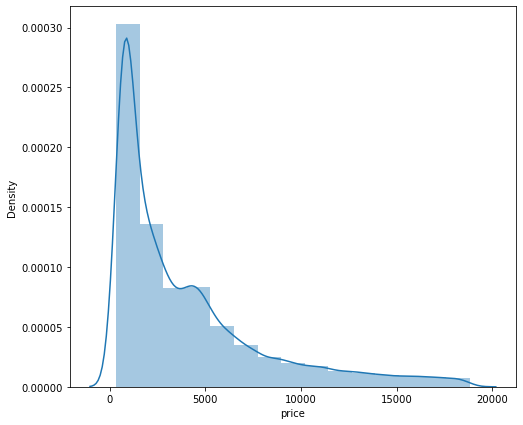

In [65]:
#to create a price distribution across the graph
plt.figure(figsize=(8,7),facecolor='white')
sn.distplot(dataset['price'],bins=15)
plt.show()

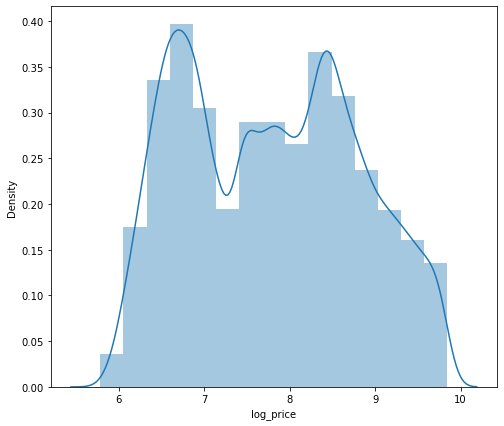

In [66]:
#to create a log_price distribution across the graph
plt.figure(figsize=(8,7),facecolor='white')
sn.distplot(dataset['log_price'],bins=15)
plt.show()

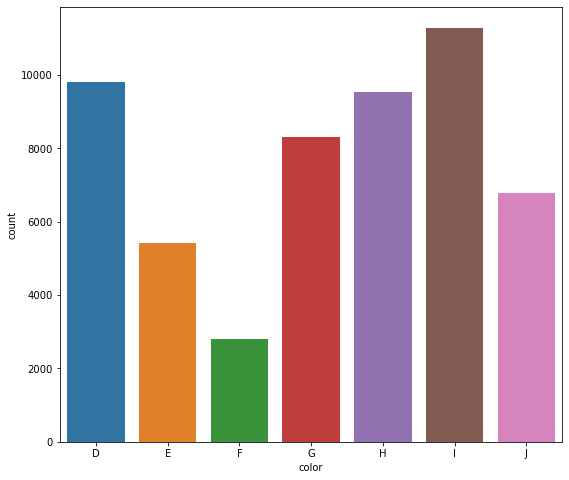

In [67]:
plt.figure(figsize=(9,8),facecolor='white')
sn.countplot(dataset['color'])
plt.xticks([0,1,2,3,4,5,6],['D','E','F','G','H','I','J'])
plt.show()

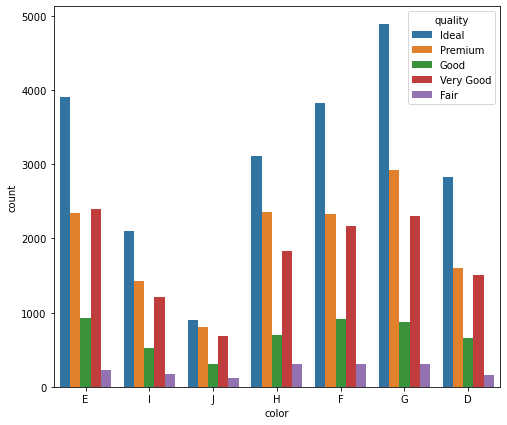

In [68]:
#to compare color with quality
plt.figure(figsize=(8,7),facecolor='white')
sn.countplot(x='color',hue='quality',data=dataset)
plt.show()

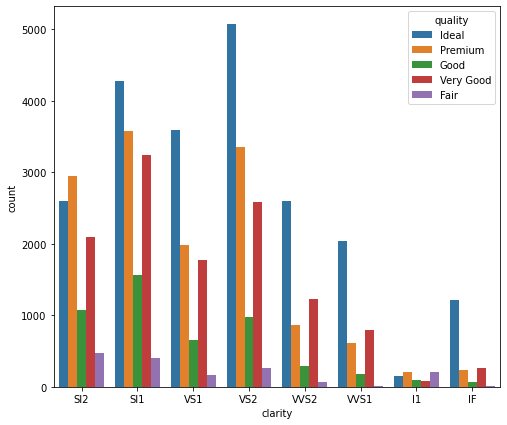

In [69]:
#to compare clarity with quality
plt.figure(figsize=(8,7),facecolor='white')
sn.countplot(x='clarity',hue='quality',data=dataset)
plt.show()

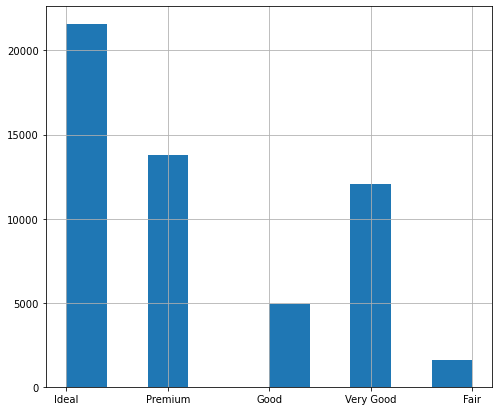

In [70]:
#to check quality distribution
plt.figure(figsize=(8,7),facecolor='white')
dataset['quality'].hist()
plt.show()

In [73]:
#to predict the accuracy of prediction
def splitdataset(data):
    X=data.values[:,2:10]
    Y=data.values[:,11]
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=100)
    return X, Y, X_train, X_test, y_train, y_test

def train_gini(X_train,X_test,y_train):
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
    
    clf_gini.fit(X_train, y_train)
    return clf_gini

def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

def prediction(X_test,clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted Values:")
    print(y_pred)
    return y_pred

def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
    
def main():
    data = pd.read_csv("dataset/diamonds.csv")
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
    print("\n")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
    
    print("\n")
    print("-"*120)
    print("\n\n")
    
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
    
    print("\n")
    print("-"*120)
    print("\n\n")
    
if __name__ == "__main__":
    main()

Results Using Gini Index:


Predicted Values:
['Ideal' 'Ideal' 'Good' ... 'Ideal' 'Ideal' 'Good']
Confusion Matrix:  [[ 371   81    7   41    0]
 [  46 1013   41  331    0]
 [   1   17 6036  381    0]
 [   0    0  512 3680    0]
 [   7  839 1093 1685    0]]
Accuracy :  68.59473489061921
Report :                precision    recall  f1-score   support

        Fair       0.87      0.74      0.80       500
        Good       0.52      0.71      0.60      1431
       Ideal       0.79      0.94      0.85      6435
     Premium       0.60      0.88      0.71      4192
   Very Good       0.00      0.00      0.00      3624

    accuracy                           0.69     16182
   macro avg       0.56      0.65      0.59     16182
weighted avg       0.54      0.69      0.60     16182



------------------------------------------------------------------------------------------------------------------------



Predicted Values:
['Ideal' 'Ideal' 'Good' ... 'Ideal' 'Ideal' 'Premium']
Confusion Matr

In [77]:
import pickle
#pickle is used for serialization = data to one specific model which is ready to use(DUMP)
#Deserialization = for loading that particular model(LOAD)
with open('test','wb') as files:
    pickle.dump(lr,files)#writing of file

In [28]:
#to save the processed csv file
dataset.to_csv("clean_csv/updated_diamonds.csv",index = False)